In [3]:
from arpes.io import load_data
from arpes.utilities.conversion import convert_to_kspace

import os.path
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import math
import numpy as np
import xarray as xr
import fft_PSI


/Users/iansackin/sls_arpes/arpes-sls_ultra_plugin/arpes/config.py:54: UserWarning: Could not find local configuration file. If you don't have one, you can safely ignore this message.
  warnings.warn(msg)


Activating auto-logging. Current session state plus future input saved.
Filename       : logs/unnamed_2024-07-10_13-17-33.log
Mode           : backup
Output logging : False
Raw input log  : False
Timestamping   : False
State          : active


In [4]:
# Define directory
path = os.path.abspath(('/Users/iansackin/Library/CloudStorage/Box-Box/'+
                        'REU_Ian/ARPES_data_Bi2223/Box_1_square_renamed/'))

# Different parameters used to set up scans at SLS
scan_type = 'EDC'
direction = 'X'
phi = '*'
energy = '*'
polarization = '*'
temp = '*'
e_pass = '*'+'eVpass'
comment = 'GoldRef11K'
run = '*'.zfill(4)

# Put together string for finding file
parameters = [scan_type, direction, phi, energy, polarization, temp, e_pass, comment, run]
if comment == '':
    parameters.remove(comment)
file_type = 'h5'
file_name = '_'.join(parameters)
file = '.'.join([file_name , file_type])

full_file = os.path.join(path, file)
file

'EDC_X_*_*_*_*_*eVpass_GoldRef11K_000*.h5'

In [5]:
import glob
# Load all files with above specified parameters, * is a placeholder and imports all files in its place
files = glob.glob(full_file)
print('Files found: '+str(len(files)))


Files found: 6


In [6]:
data_list = {}
for file in files:
    #data_list.append(load_data(file, location="ULTRA"))
    data = load_data(file, location="ULTRA")
    file_name = file.replace(path, '')[1:-3]
    data_list.update({file_name : data})

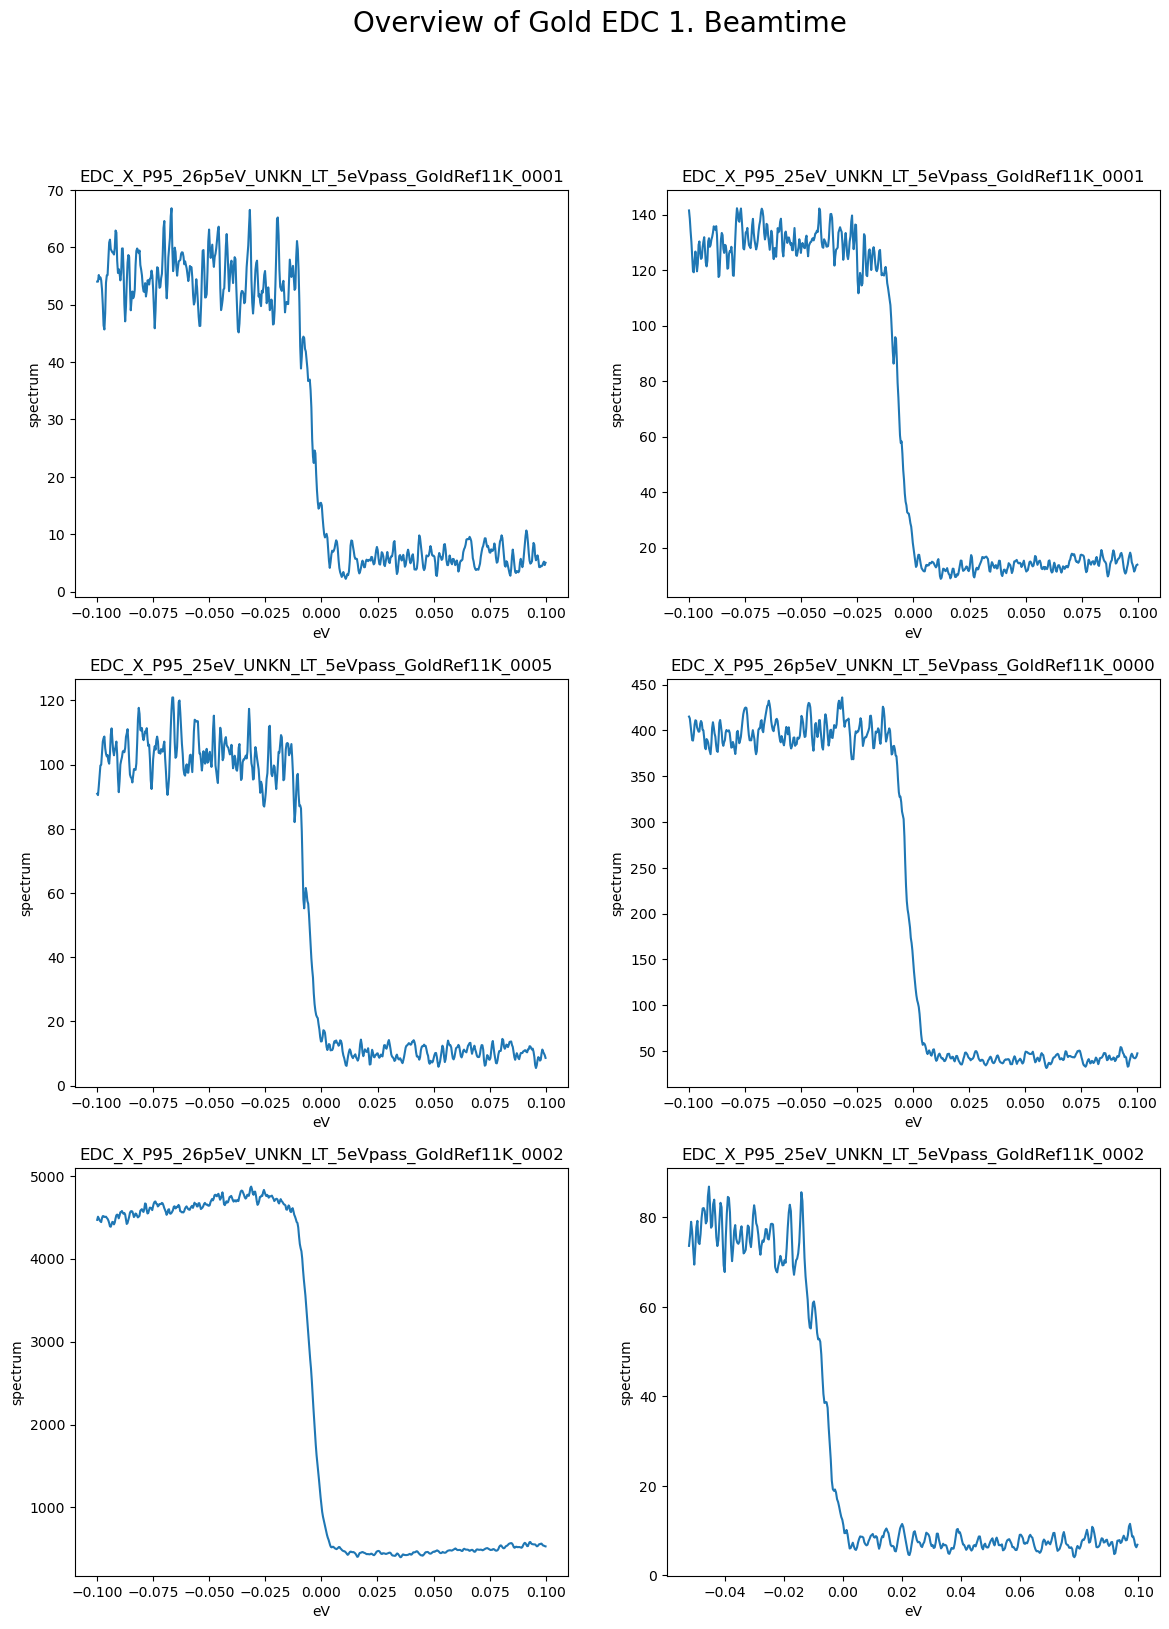

In [7]:
#! Plot section
rows = math.ceil(len(data_list) / 2)
fig, ax = plt.subplots(rows, 2, figsize=(14, 6*rows))
fig.suptitle('Overview of Gold EDC 1. Beamtime', fontsize=20)
for key in data_list.keys():
    data = data_list[key].spectrum
    fs = data.sel(eV=slice(-0.1,0.1)).sum("phi")
    fs.plot(ax=ax.ravel()[list(data_list).index(key)]) 
    ax.ravel()[list(data_list).index(key)].set_title(f"{key}")


In [10]:
# correct for Fermi level from Gold samples

folder_box1 = ('/Users/iansackin/Library/CloudStorage/Box-Box/'+
                        'REU_Ian/ARPES_data_Bi2223/Box_1_square_renamed/')
file_box1_square = os.listdir(folder_box1)

gold_ref = [s for s in file_box1_square if 'Gold' in s ] +[s for s in file_box1_square if 'GOLD' in s ]
gold_ref = [s for s in gold_ref if not('._') in s]
    
gold_list = {}
for file in gold_ref:
    #data_list.append(load_data(file, location="ULTRA"))
    data = load_data(folder_box1+file, location="ULTRA")
    scan_name = file.replace('.h5', '')
    gold_list.update({scan_name : data})
    
    

In [11]:
from fft_PSI import remove_gridlines
test = remove_gridlines(fs, show_fft = True, threshold=8.3)

ValueError: not enough values to unpack (expected 2, got 1)

In [12]:
test.S.plot()

NameError: name 'test' is not defined

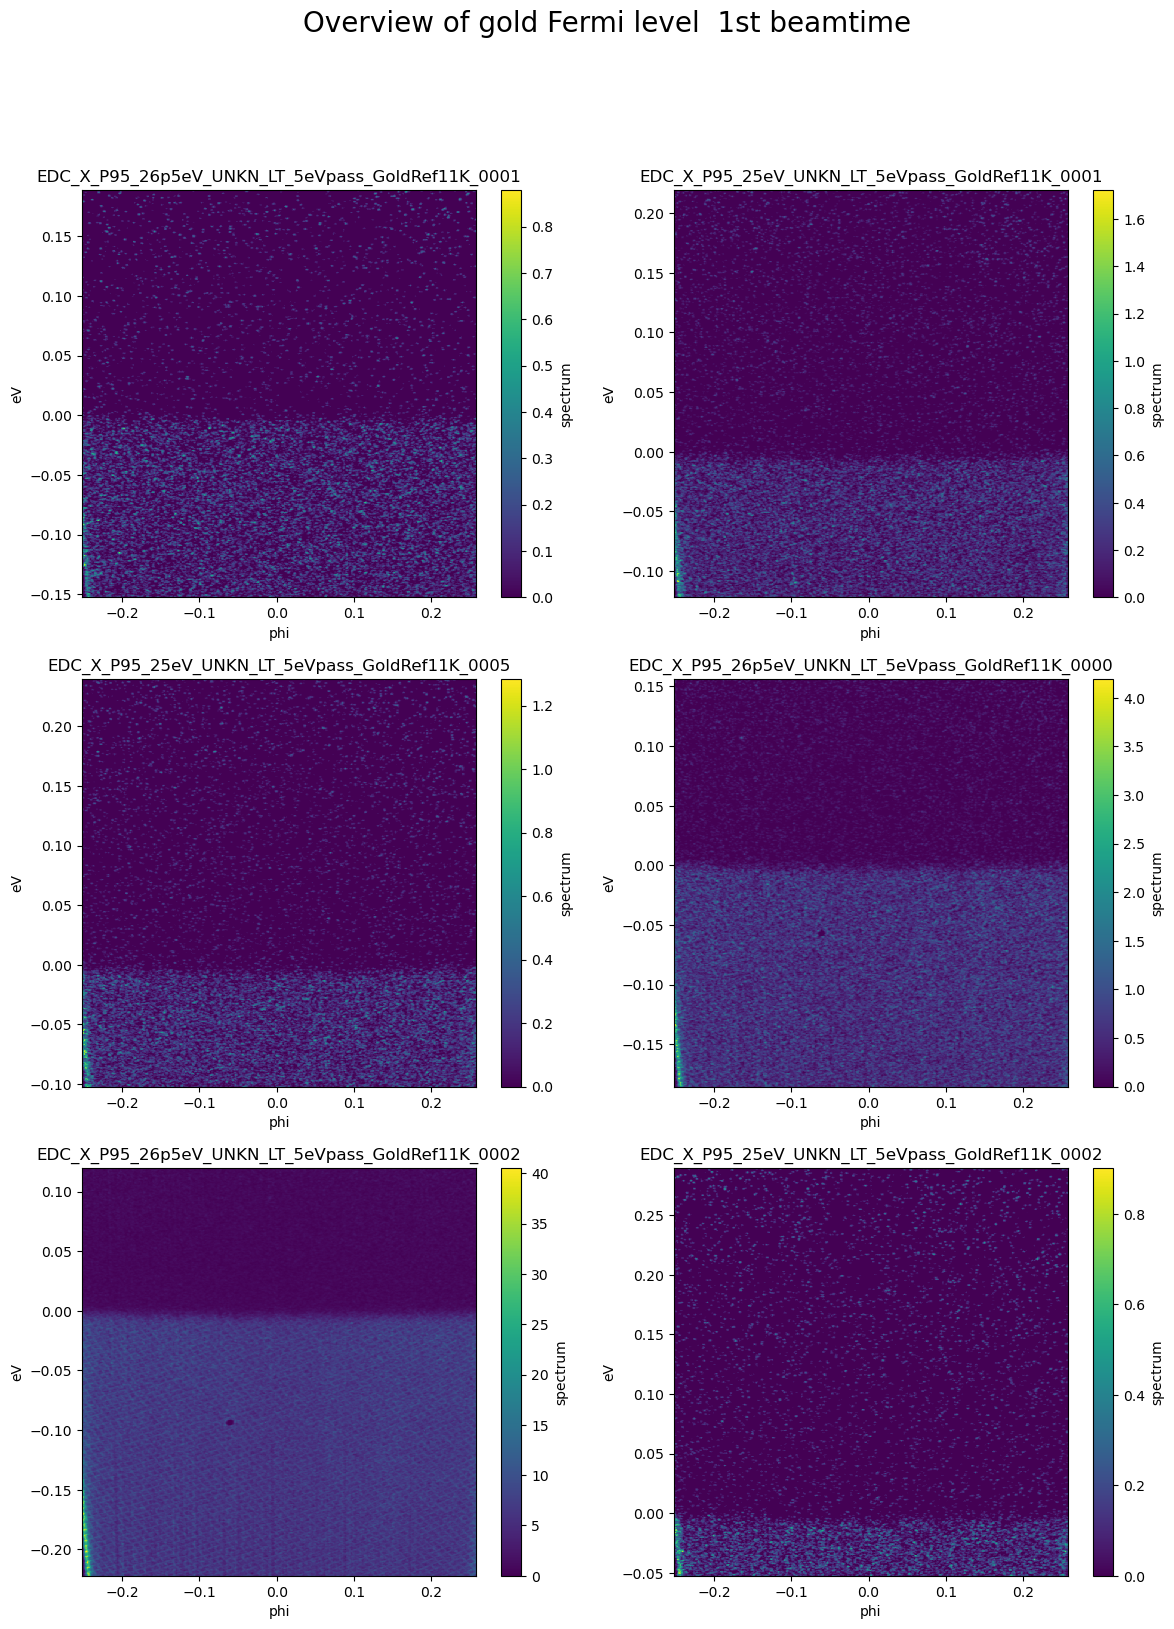

In [13]:
#! Plot section Gold EDC
rows = math.ceil(len(data_list) / 2)
fig, ax = plt.subplots(rows, 2, figsize=(14, 6*rows))
fig.suptitle('Overview of gold Fermi level  1st beamtime', fontsize=20)
for key in gold_list.keys():
    data = gold_list[key]
    #fs.plot(ax=ax.ravel()[list(gold_list).index(key)])
    data.spectrum.S.plot(ax=ax.ravel()[list(gold_list).index(key)])
    ax.ravel()[list(gold_list).index(key)].set_title(f"{key}")

In [14]:
print(files[3])

/Users/iansackin/Library/CloudStorage/Box-Box/REU_Ian/ARPES_data_Bi2223/Box_1_square_renamed/EDC_X_P95_26p5eV_UNKN_LT_5eVpass_GoldRef11K_0000.h5


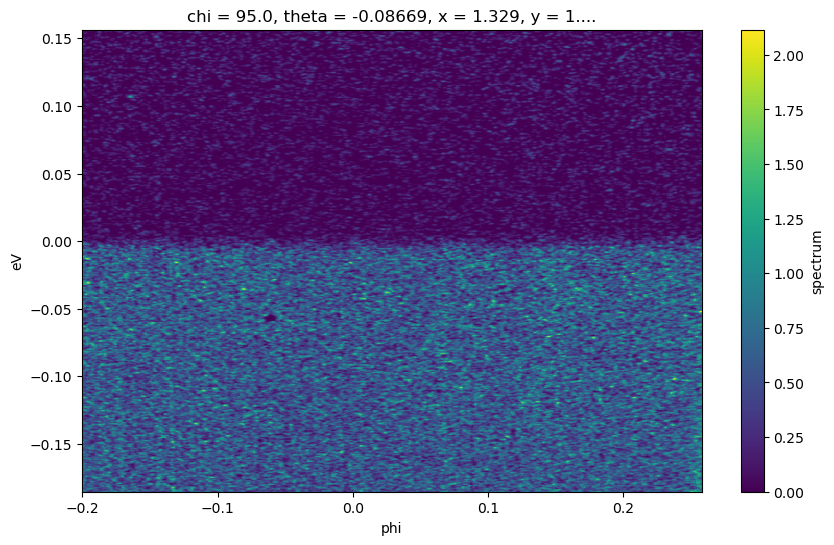

In [15]:
#Getting Fermi-Level
import math
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,6))
data_list = {}

data = load_data(files[3], location="ULTRA")
file_name = file.replace(path, '')[1:-3]
fs = data.spectrum
edge = data.sel(phi=slice(-0.2,None)).spectrum
#edge = remove_gridlines(fs, threshold=9)
edge.S.plot()

In [16]:
fs

<xarray.DataArray 'spectrum' (eV: 961, phi: 661)>
array([[1.70786658e-01, 1.24208845e-01, 1.22303418e-01, ...,
        1.12576919e+00, 1.00359577e+00, 9.48843962e-01],
       [1.17324520e-01, 1.04213291e-01, 1.11776220e-01, ...,
        1.05010990e+00, 9.00280997e-01, 8.78318543e-01],
       [3.14172284e-02, 3.84565611e-02, 5.23858968e-02, ...,
        9.40900376e-01, 7.61870243e-01, 7.86090561e-01],
       ...,
       [2.43139504e-01, 4.11062320e-01, 5.68970806e-01, ...,
        5.61793658e-05, 4.18565231e-02, 6.04778310e-02],
       [1.82345517e-01, 3.73071618e-01, 5.78976319e-01, ...,
        0.00000000e+00, 3.65774560e-03, 8.17148587e-03],
       [9.94804627e-02, 2.88039990e-01, 5.03767013e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])
Coordinates:
  * eV       (eV) float64 -0.1852 -0.1849 -0.1845 ... 0.1555 0.1558 0.1562
  * phi      (phi) float64 -0.2517 -0.2509 -0.2501 ... 0.2563 0.2571 0.2578
    chi      float64 95.0
    theta    float64 -0.08669
    x        float64 1.329
    y        float64 1.201
    z        float64 -0.9995
    hv       float64 26.5
    alpha    float64 0.0
    psi      float64 0.0
    beta     float64 -0.08669
Attributes: (12/134)
    Acquisition Mode:                            Fixed
    Axis0.Description:                           Kinetic Energy 
    Axis0.Mode:                                  N/A
    Axis0.Scale:                                 [2.18507453e+01 3.55245000e-04]
    Axis0.ScaleType:                             Regular
    Axis0.Units:                                 eV
    ...                                          ...
    hv Recording Method:                         After first sweep
    hv Units:                                    eV
    sample_workfunction:                         4.464
    theta_offset:                                -0.08669261446710663
    spectrum_type:                               cut
    chi_offset:                                  94.9983375

Running on multiprocessing pool... this may take a while the first time.


Fitting on pool...:   0%|          | 0/298 [00:00<?, ?it/s]

Deserializing...
Finished deserializing


<xarray.Dataset>
Dimensions:        (phi: 298, eV: 961)
Coordinates:
  * phi            (phi) float64 -0.02934 -0.02857 -0.0278 ... 0.1992 0.1999
    chi            float64 95.0
    theta          float64 -0.08669
    x              float64 1.329
    y              float64 1.201
    z              float64 -0.9995
    hv             float64 26.5
    alpha          float64 0.0
    psi            float64 0.0
    beta           float64 -0.08669
  * eV             (eV) float64 -0.1852 -0.1849 -0.1845 ... 0.1555 0.1558 0.1562
Data variables:
    results        (phi) object <lmfit.model.ModelResult object at 0x169c3f4c...
    data           (eV, phi) float64 0.5834 0.5864 0.5507 ... 0.007997 0.05013
    residual       (eV, phi) float64 -0.1788 -0.1337 -0.06152 ... 0.06673 0.0284
    norm_residual  (eV, phi) float64 -0.3065 -0.2281 -0.1117 ... 8.345 0.5665

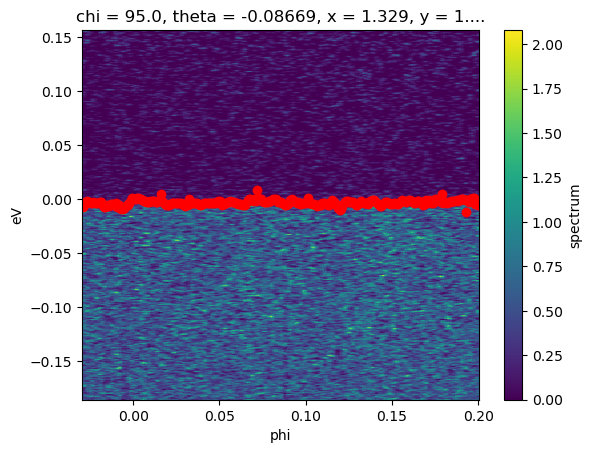

In [14]:
from arpes.fits.fit_models import AffineBroadenedFD, FermiDiracModel, QuadraticModel
from arpes.fits.utilities import broadcast_model
edge = edge.sel(phi=slice(-0.03,0.2))
broadcast_result = broadcast_model(
    AffineBroadenedFD,
    edge,
    "phi"
)

fig, ax = plt.subplots()
 
edge.sel(eV=slice(-0.2,0.2)).S.plot()
ax.scatter(*broadcast_result.F.p("fd_center").G.to_arrays(), color="red")
broadcast_result

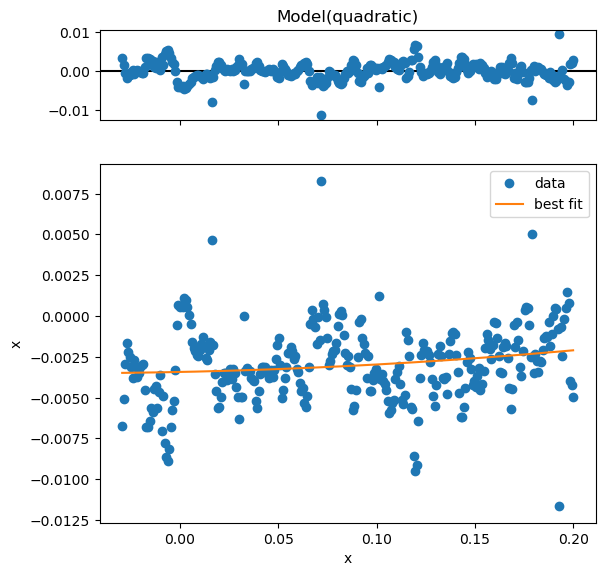

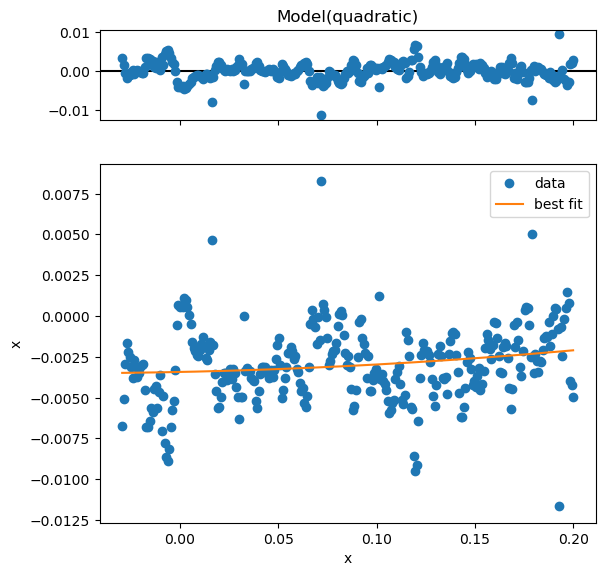

In [15]:

quad_mod = QuadraticModel().guess_fit(broadcast_result.F.p("fd_center"))
quad_mod.plot()

In [59]:
corrected_map

<xarray.DataArray (eV: 961, phi: 298)>
array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.73192781e-04, 1.07954259e-01, 2.01037998e-01, ...,
        1.00404463e-02, 2.67375119e-02, 7.38348696e-02],
       [3.28707353e-05, 1.06538276e-01, 2.20340251e-01, ...,
        2.15914014e-05, 1.99753428e-03, 1.61635795e-02],
       [6.51224926e-03, 4.52664667e-02, 1.57109841e-01, ...,
        1.99427524e-03, 3.00032097e-02, 2.28108068e-03]])
Coordinates:
  * eV       (eV) float64 -0.1852 -0.1849 -0.1845 ... 0.1555 0.1558 0.1562
  * phi      (phi) float64 -0.02934 -0.02857 -0.0278 ... 0.1984 0.1992 0.1999
    chi      float64 95.0
    theta    float64 -0.08669
    x        float64 1.329
    y        float64 1.201
    z        float64 -0.9995
    hv       float64 26.5
    alpha    float64 0.0
    psi      float64 0.0
    beta     float64 -0.08669
Attributes: (12/134)
    Acquisition Mode:                            Fixed
    Axis0.Description:                           Kinetic Energy 
    Axis0.Mode:                                  N/A
    Axis0.Scale:                                 [2.18507453e+01 3.55245000e-04]
    Axis0.ScaleType:                             Regular
    Axis0.Units:                                 eV
    ...                                          ...
    hv Recording Method:                         After first sweep
    hv Units:                                    eV
    sample_workfunction:                         4.464
    theta_offset:                                -0.08669261446710663
    spectrum_type:                               cut
    chi_offset:                                  94.9983375

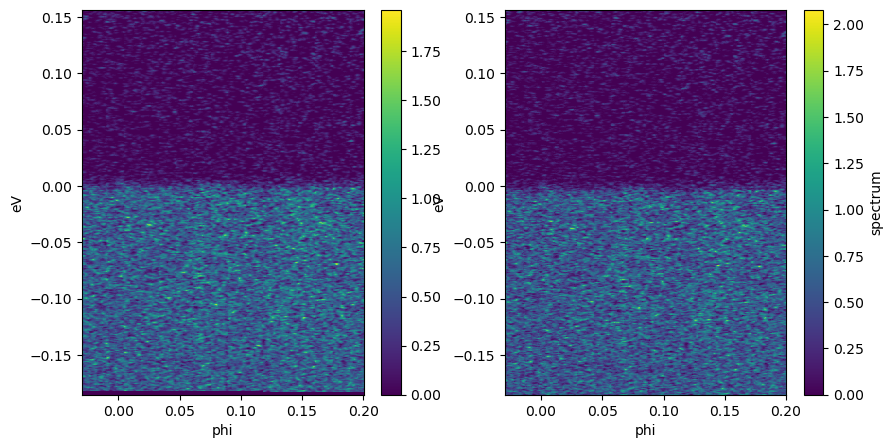

In [58]:
import xarray as xr
quad_edge = quad_mod.eval(x=edge.phi)
corrected_map = edge.G.shift_by(
    xr.DataArray(quad_edge, dims=['phi'],
                 coords={'phi':np.array(edge.coords['phi'])}),
    "eV"
)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
corrected_map.S.plot(ax=axes[0])
edge.S.plot(ax=axes[1])

for ax in axes:
    ax.set_title("")

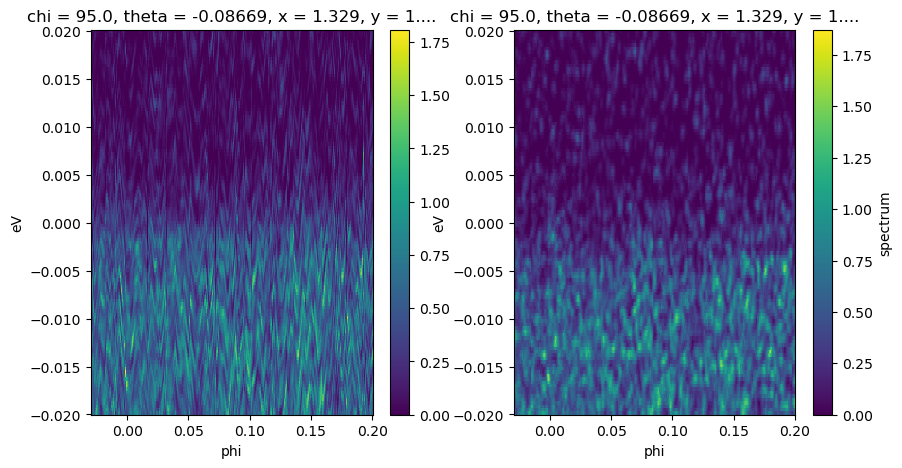

In [17]:

corrected_edge = edge.G.shift_by(
    broadcast_result.F.p("fd_center"), shift_axis="eV", shift_coords=False)

#results_check = broadcast_model(AffineBroadenedFD, corrected_edge, "phi")

fig, axes = plt.subplots(1, 2, figsize=(10,5))
corrected_edge.sel(eV=slice(-0.02,0.02)).S.plot(ax=axes[0])
edge.sel(eV=slice(-0.02,0.02)).S.plot(ax=axes[1])

#axes[0].scatter(*results_check.F.p("fd_center").G.to_arrays(), color="red")

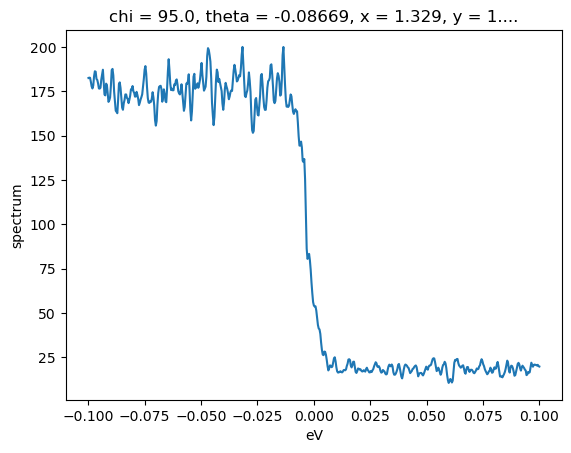

In [18]:
edge.sel(eV=slice(-0.1,0.1)).sum('phi').S.plot()

$$\textbf{Fermi Surface Corrections and Analysis}$$

In [19]:
# Define directory
path = os.path.abspath(('/Users/iansackin/Library/CloudStorage/Box-Box/'+
                        'REU_Ian/ARPES_data_Bi2223/Box_1_square_renamed/'))

# Different parameters used to set up scans at SLS
scan_type = 'FS'
direction = 'N'
phi = '*'
energy = '*'
polarization = '*'
temp = '*'
e_pass = '*'+'eVpass'
comment = ''
run = '*'.zfill(4)

# Put together string for finding file
parameters = [scan_type, direction, phi, energy, polarization, temp, e_pass, comment, run]
if comment == '':
    parameters.remove(comment)
file_type = 'h5'
file_name = '_'.join(parameters)
file_fs = '.'.join([file_name , file_type])

full_file = os.path.join(path, file_fs)
file_fs

'FS_N_*_*_*_*_*eVpass_000*.h5'

In [20]:
import glob
# Load all files with above specified parameters, * is a placeholder and imports all files in its place
files_fs = glob.glob(full_file)
print('Files found: '+str(len(files_fs)))


Files found: 4


In [21]:
print(files_fs[0])

/Users/iansackin/Library/CloudStorage/Box-Box/REU_Ian/ARPES_data_Bi2223/Box_1_square_renamed/FS_N_M42_26p5eV_LHQ_LT_5eVpass_0001.h5


In [22]:
data_list_fs = {}
data_fs = load_data(files_fs[0], location="ULTRA")
file_name = file.replace(path, '')[1:-3]
data_list_fs.update({file_name : data})

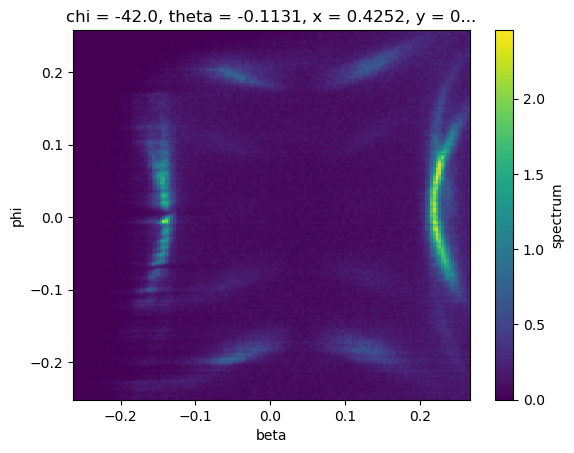

In [23]:
data_fs.S.fermi_surface.spectrum.plot()
# plt.axvline(0.25)

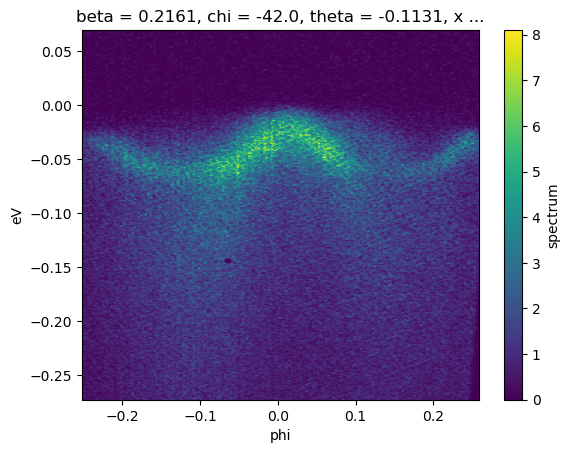

In [24]:
data_fs.spectrum.sel(beta=0.215, method='nearest').S.plot()

(961, 661)


/Users/iansackin/sls_arpes/arpes-sls_ultra_plugin/fft_PSI/fft_filter_psi.py:130: RuntimeWarning: divide by zero encountered in log
  fshift_mask_mag = np.log(cv2.magnitude(fshift[:,:,0], fshift[:,:,1]))


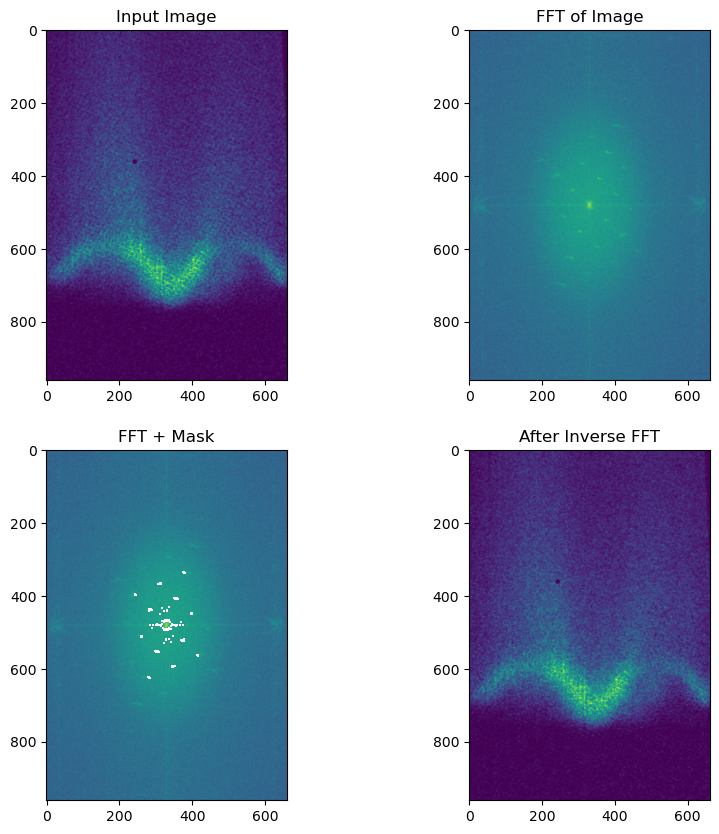

In [25]:
smoothed_fs = remove_gridlines(data_fs.spectrum.sel(beta=0.215,method='nearest'), show_fft=True, threshold=8, r=12)

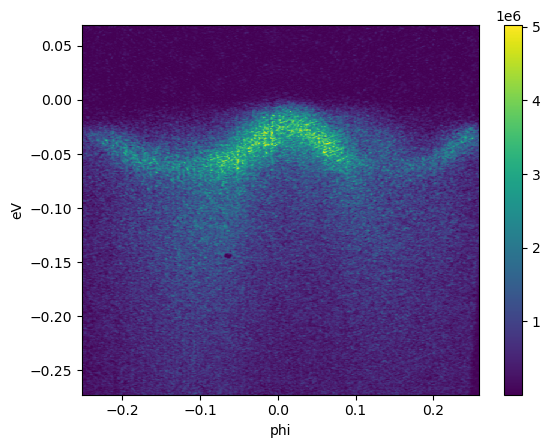

In [26]:
smoothed_fs.S.plot()

In [27]:
print(len(broadcast_result.sel(phi=slice(-0.0305, 0.042))['phi']))
print(len(smoothed_fs.sel(phi=slice(-0.0305, 0.041))['phi']))

93
93


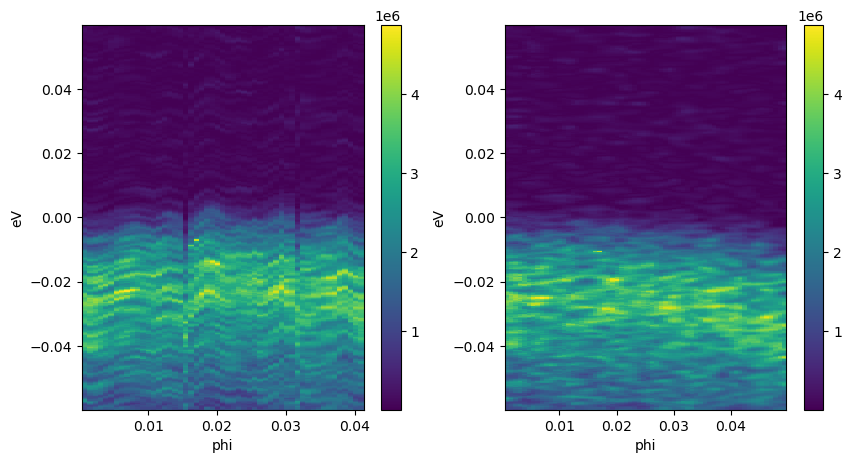

In [28]:

corrected_fs = smoothed_fs.sel(phi=slice(-0.0305, 0.041)).G.shift_by(
        broadcast_result.sel(phi=slice(-0.0305, 0.042)).F.p("fd_center"), shift_axis="eV", shift_coords=False
    )

#results_check = broadcast_model(AffineBroadenedFD, corrected_edge, "phi")

fig, axes = plt.subplots(1, 2, figsize=(10,5))
corrected_fs.sel(eV=slice(-0.06,0.06), phi=slice(0,0.05)).S.plot(ax=axes[0])
smoothed_fs.sel(eV=slice(-0.06,0.06), phi=slice(0,0.05)).S.plot(ax=axes[1])

# axes[0].scatter(*results_check.F.p("fd_center").G.to_arrays(), color="red")

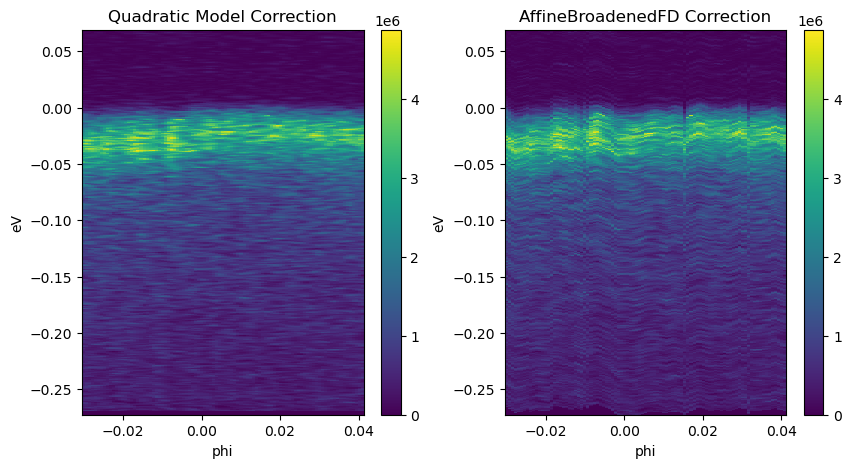

In [45]:
import xarray as xr
quad_edge = quad_mod.eval(x=smoothed_fs.sel(phi=slice(-0.0305, 0.041)).phi)
corrected_fs_quad = smoothed_fs.sel(phi=slice(-0.0305, 0.041)).G.shift_by(
    xr.DataArray(quad_edge, dims=['phi'],
                 coords={'phi':np.array(smoothed_fs.sel(phi=slice(-0.0305, 0.041)).coords['phi'])}),
    "eV"
)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
corrected_fs_quad.S.plot(ax=axes[0])
corrected_fs.S.plot(ax=axes[1])

axes[0].title.set_text("Quadratic Model Correction")
axes[1].title.set_text("AffineBroadenedFD Correction")

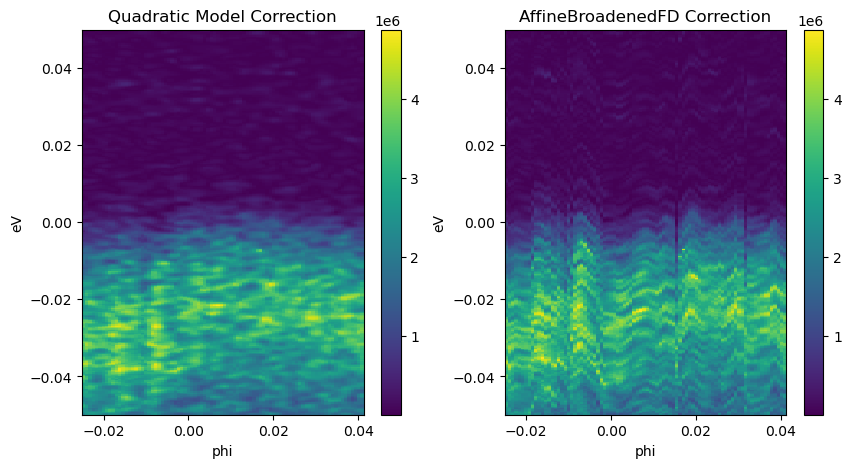

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
corrected_fs.sel(phi=slice(-0.025, 0.2), eV=slice(-0.05,0.05)).S.plot(ax=axes[1])
corrected_fs_quad.sel(phi=slice(-0.025, 0.2), eV=slice(-0.05,0.05)).S.plot(ax=axes[0])
axes[0].title.set_text("Quadratic Model Correction")
axes[1].title.set_text("AffineBroadenedFD Correction")

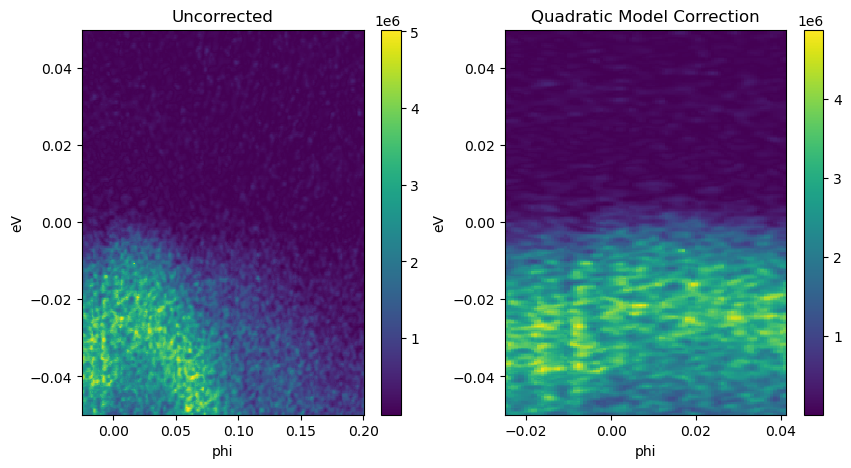

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
corrected_fs_quad.sel(phi=slice(-0.025, 0.2), eV=slice(-0.05,0.05)).S.plot(ax=axes[1])
smoothed_fs.sel(phi=slice(-0.025, 0.2), eV=slice(-0.05,0.05)).S.plot(ax=axes[0])
axes[1].title.set_text("Quadratic Model Correction")
axes[0].title.set_text("Uncorrected")

<xarray.DataArray 'eV' ()>
array(-0.03021075)
Coordinates:
    eV       float64 -0.03021
    phi      float64 0.01003
    chi      float64 -42.0
    theta    float64 -0.1131
    x        float64 0.4252
    y        float64 0.1407
    z        float64 0.8517
    hv       float64 26.5
    alpha    float64 0.0
    psi      float64 0.0

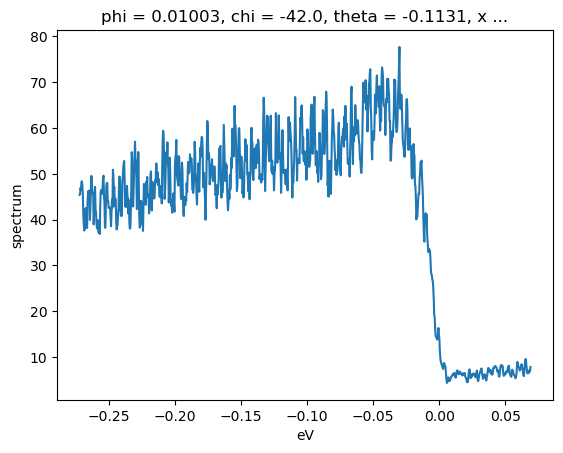

In [56]:
cut_ = fmap.sel(phi=slice(-0.3,0.3),method='nearest').sum('phi').sum("beta")
cut_.S.plot()
cut_max_ = cut_.eV[cut_.argmax()] 
cut_max_

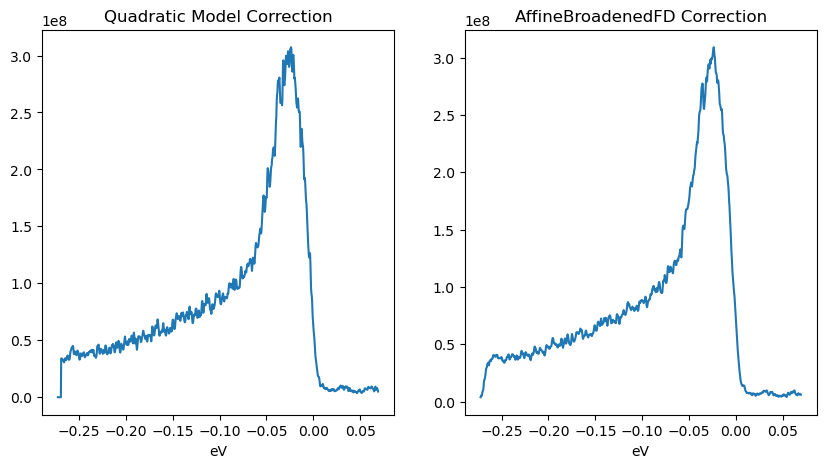

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
corrected_fs.sel(phi=slice(-0.0305, 0.041)).sum('phi').S.plot(ax=axes[1])
corrected_fs_quad.sel(phi=slice(-0.0305, 0.041)).sum('phi').S.plot(ax=axes[0])
axes[0].title.set_text("Quadratic Model Correction")
axes[1].title.set_text("AffineBroadenedFD Correction")

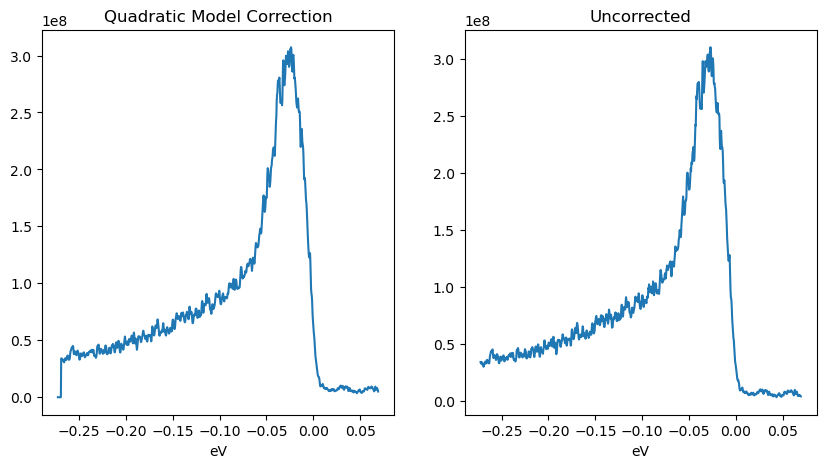

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
corrected_fs_quad.sel(phi=slice(-0.0305, 0.041)).sum('phi').S.plot(ax=axes[0])
smoothed_fs.sel(phi=slice(-0.0305, 0.041)).sum('phi').S.plot(ax=axes[1])
axes[0].title.set_text("Quadratic Model Correction")
axes[1].title.set_text("Uncorrected")

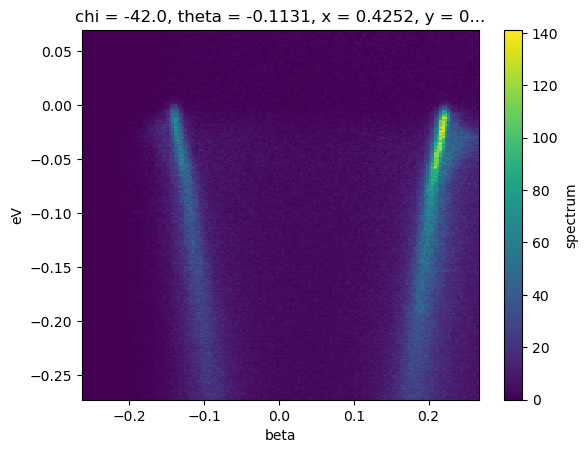

In [51]:
cut = fmap.sel(phi=slice(-0.01,0.01)).sum('phi')
cut.S.plot()

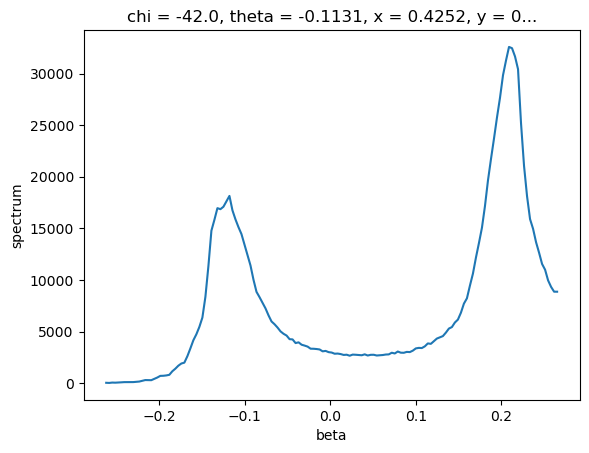

In [52]:
cut.sum('eV').plot()

In [53]:
import xarray as xr
fmap = data_fs.spectrum
cut = fmap.sel(phi=slice(-0.01,0.01)).sum('phi')

#Finding Gamma Point on Beta
cut_range_beta = cut.beta[-1] - cut.beta[0]
cut_max_1 = cut.beta[cut.sel(beta=slice(-cut_range_beta/2,0.0)).sum('eV').argmax()] 
cut_max_2 = cut.beta[cut.sel(beta=slice(0,cut_range_beta/2)).sum('eV').argmax()] + cut_range_beta/2

gamma_shift_beta = float((cut_max_1 + cut_max_2) / 2)

fermi_edge = xr.DataArray(gamma_shift_beta * np.ones(len(cut.eV)), dims='eV', coords={"eV": np.array(cut.eV)})

fermi_surface_corrected = fmap.G.shift_by(
    fermi_edge,
    shift_axis = "beta"
)

#Finding Gamma Point on Phi
cut = fmap.sel(beta=slice(-0.01,0.01)).sum('beta')
cut_range_phi = cut.phi[-1] - cut.phi[0]
cut_max_1 = cut.phi[cut.sel(phi=slice(-cut_range_phi/2,0.0)).sum('eV').argmax()] 
cut_max_2 = cut.phi[cut.sel(phi=slice(0,cut_range_phi/2)).sum('eV').argmax()] + cut_range_phi/2

gamma_shift_phi = float((cut_max_1 + cut_max_2) / 2)

fermi_edge = xr.DataArray(gamma_shift_phi * np.ones(len(cut.eV)), dims='eV', coords={"eV": np.array(cut.eV)})

fermi_surface_corrected = fermi_surface_corrected.G.shift_by(
    fermi_edge,
    shift_axis = "phi"
)

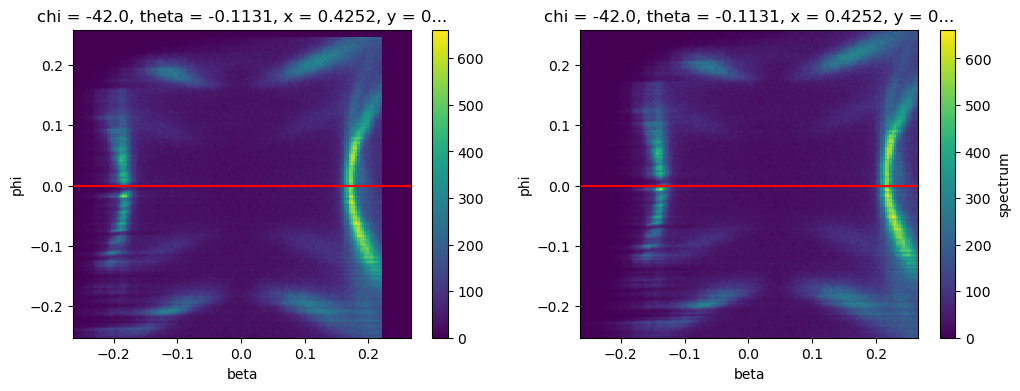

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
fermi_surface_corrected.sel(eV=slice(-0.05,0.05)).sum('eV').S.plot(ax=ax[0])
fmap.sel(eV=slice(-0.05,0.05)).sum('eV').S.plot(ax=ax[1])
x = np.linspace(-0.3,0.3, 100)
y = np.zeros(100)
ax[0].plot(x,y,color='red')
ax[1].plot(x,y,color='red')

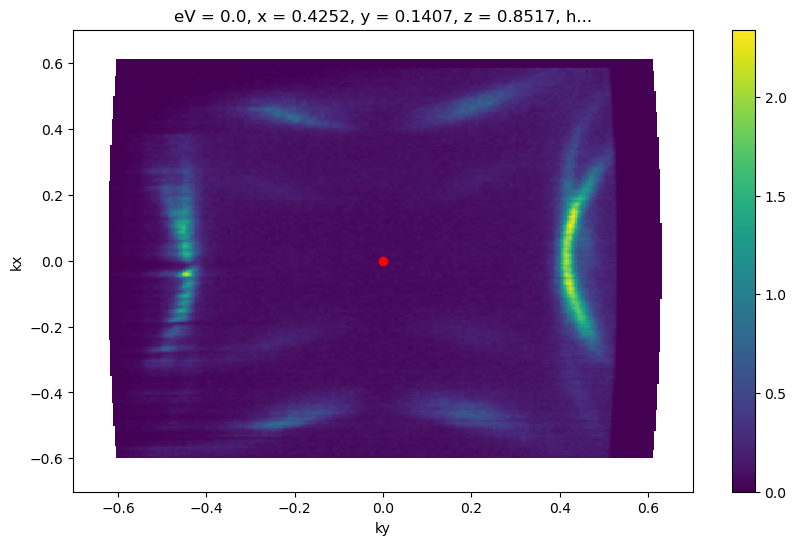

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
fermi_surface_k = convert_to_kspace(
    fermi_surface_corrected.sel(eV=slice(-0.1,0.1)).S.fermi_surface,
    kx = np.linspace(-0.7,0.7,400),
    ky = np.linspace(-0.7,0.7,400)
)
fermi_surface_k.S.plot()
plt.scatter(0, 0, color='red')

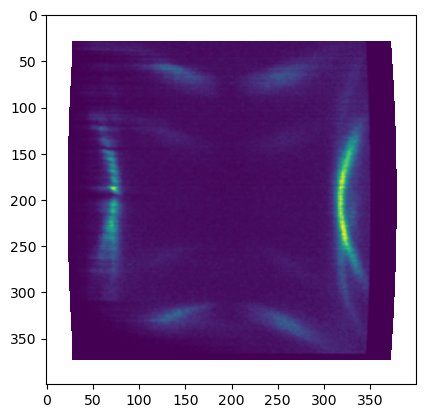

In [74]:
plt.imshow(fermi_surface_k)

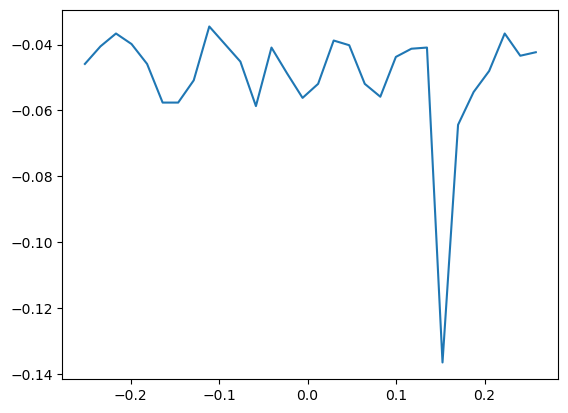

In [75]:
#Finding Energy Gap as a function of kx and ky
import numpy as np
import matplotlib.pyplot as plt

phis = np.linspace(min(fmap.phi), max(fmap.phi), 30)
mxs_phi = []
for i in phis:
    cut = fmap.sel(phi=i, method='nearest').sum('beta')
    cut_max = cut.eV[cut.argmax()] 
    mxs_phi.append(cut_max)
plt.plot(phis, mxs_phi)

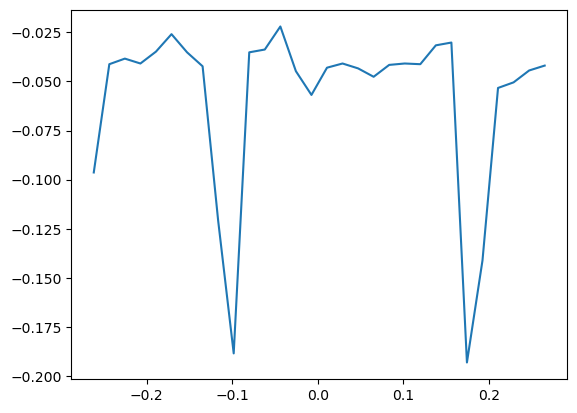

In [76]:
betas = np.linspace(min(fmap.beta), max(fmap.beta), 30)
mxs_beta = []
for i in betas:
    cut = fmap.sel(beta=i, method='nearest').sum("phi")
    cut_max = cut.eV[cut.argmax()] 
    mxs_beta.append(cut_max)
plt.plot(betas, mxs_beta)

In [77]:
gaps = np.zeros((30,30,900))
gap = []
for i in range(len(betas)):
    for j in range(len(phis)):
        cut = fmap.sel(beta=i, phi=j, method='nearest')
        cut_max = cut.eV[cut.argmax()]
        gap.append(cut_max)
        gaps[i][j] = cut_max
gaps.shape

(30, 30, 900)

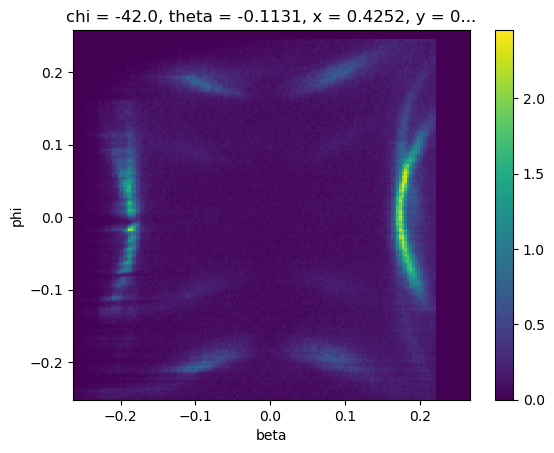

In [78]:
fermi_surface_corrected.S.fermi_surface.plot()

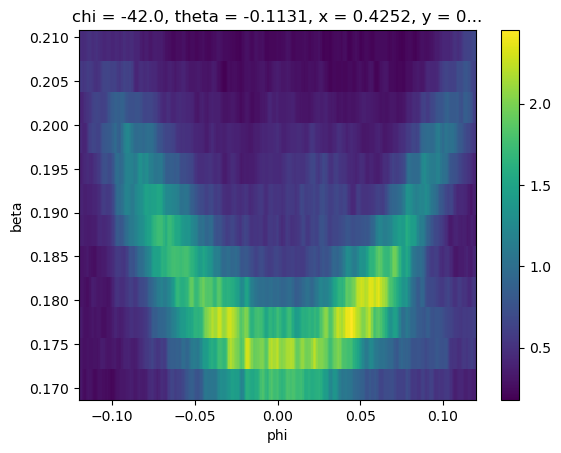

In [79]:
cut_full_spectrum = fermi_surface_corrected.sel(beta=slice(0.17,0.21), phi=slice(-0.12,0.12))
cut = cut_full_spectrum.S.fermi_surface.T
cut.plot()

In [80]:
phis = cut.phi
betas = np.zeros(len(phis))
for i, phi in enumerate(cut.phi):
    betas[i] = cut.beta[cut.sel(phi=phi).argmax()]

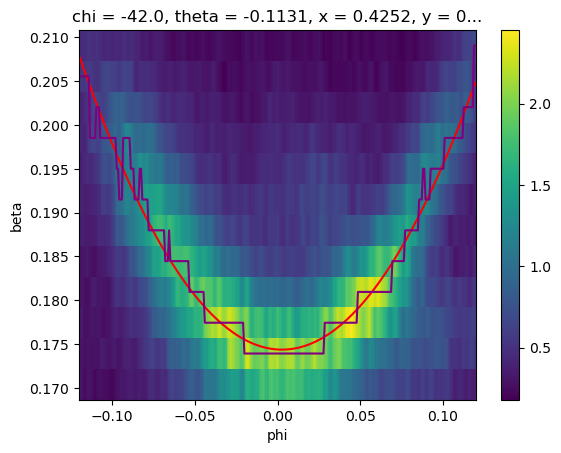

In [81]:
a, b, c = np.polyfit(phis, betas, deg=2)
fig, axes = plt.subplots(1,1)
axes.plot(phis, a*phis**2 + b*phis + c, color='red')
axes.plot(phis, betas, color='purple')
cut.plot(ax=axes)

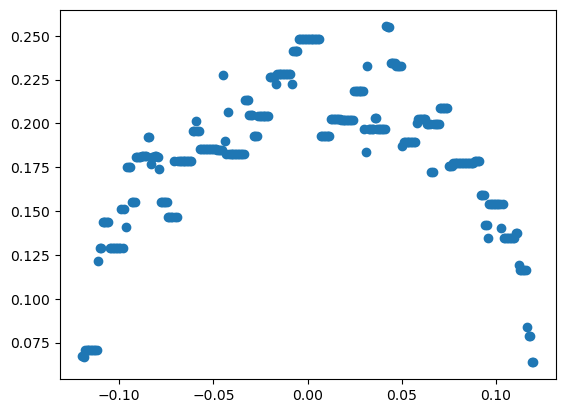

In [82]:
a, b, c = np.polyfit(phis, betas, deg=2)
points = np.zeros((len(phis), 2))
for k, point in enumerate(points):
    point[0] = phis[k]
    point[1] = a*point[0]**2 + b*point[0] + c
maxes = []
mags = []
for point in points:
    chunk = fmap.sel(
        beta = slice(point[1]-0.005, point[1]+0.005), 
        phi = slice(point[0]-0.01, point[0]+0.01)
    ).sum('beta').sum('phi')
    chunk_max = abs(fermi_surface_corrected.eV[chunk.argmax()])
    maxes.append(chunk_max)
    mags.append(np.linalg.norm(point))
plt.scatter(phis, maxes)

In [19]:
"""
Phis, Betas = np.meshgrid(phis, betas)

maxes_3d = np.zeros((311,311))

for j, phi in enumerate(phis):
    for k, beta in enumerate(betas):
        chunk = fmap.sel(
            beta = slice(beta-0.002, beta+0.002), 
            phi = slice(phi-0.005, phi+0.05)
        ).sum('beta').sum('phi')
        chunk_max = fmap.eV[chunk.argmax()]
        maxes_3d[j][k] = chunk_max
"""

"\nPhis, Betas = np.meshgrid(phis, betas)\n\nmaxes_3d = np.zeros((311,311))\n\nfor j, phi in enumerate(phis):\n    for k, beta in enumerate(betas):\n        chunk = fmap.sel(\n            beta = slice(beta-0.002, beta+0.002), \n            phi = slice(phi-0.005, phi+0.05)\n        ).sum('beta').sum('phi')\n        chunk_max = fmap.eV[chunk.argmax()]\n        maxes_3d[j][k] = chunk_max\n"

In [83]:
plt.pcolor(Phis, Betas, maxes_3d)
plt.xlabel('phi')
plt.ylabel('beta')

NameError: name 'Phis' is not defined

Parameters([('center', <Parameter 'center', value=-0.018515243063055468 +/- 0.000426, bounds=[-inf:inf]>), ('width', <Parameter 'width', value=0.03146254904191448 +/- 0.000624, bounds=[0:inf]>), ('erf_amp', <Parameter 'erf_amp', value=1899.710749910078 +/- 153, bounds=[0.0:inf]>), ('lin_bkg', <Parameter 'lin_bkg', value=-8.53110599270746 +/- 8.98e+10, bounds=[-10:10]>), ('const_bkg', <Parameter 'const_bkg', value=9.021321880917242 +/- 1.12e+11, bounds=[-50:50]>), ('gamma', <Parameter 'gamma', value=0.21019671030124099 +/- 0.00641, bounds=[0.0:inf]>), ('lorcenter', <Parameter 'lorcenter', value=0.04901103536174794 +/- 0.00818, bounds=[-inf:inf]>), ('fd_center', <Parameter 'fd_center', value=0 (fixed), bounds=[-inf:inf]>)])

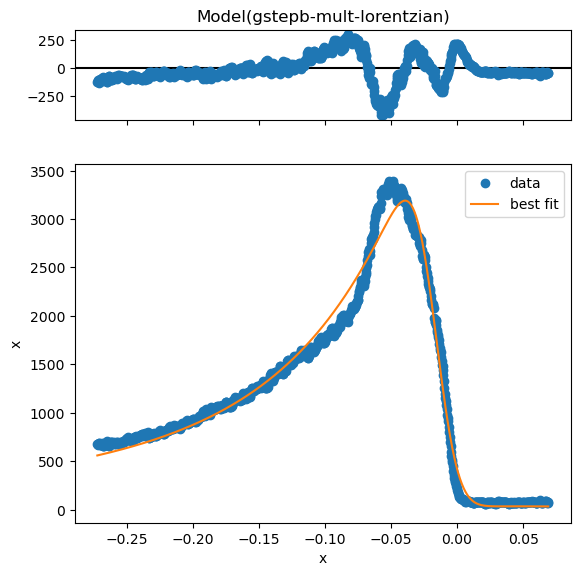

In [106]:
from arpes.fits.fit_models import GaussianModel, FermiLorentzianModel
def lorentzian(x, h, x0, W):
    value = h*W**2/((x-x0)**2+W**2)
    return value

cut_ = fmap.sel(beta=slice(0.21,0.22), phi=slice(-0.11,0.13)).sum('beta').sum('phi')
cut_.S.plot(ax=ax)
cut_max_ = cut_.eV[cut_.argmax()] 
cut_max_

#Fitting data to Lorentzian form
fit = FermiLorentzianModel().guess_fit(
    cut_.sel(eV=slice(None,None)),
    params = {"fd_center": {
        "value":0,
        "vary":False
    }}
)
fit.plot()
fit.params


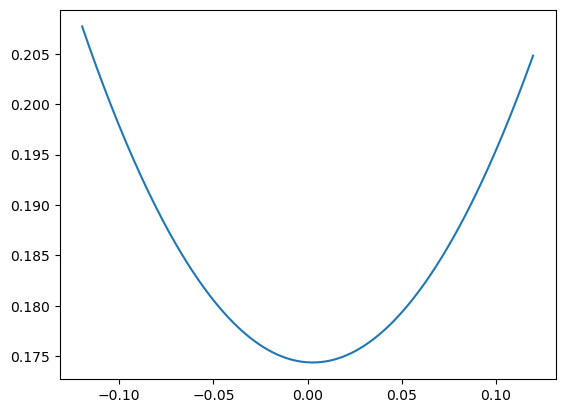

In [85]:
plt.plot(phis, a*phis**2 + b*phis + c)

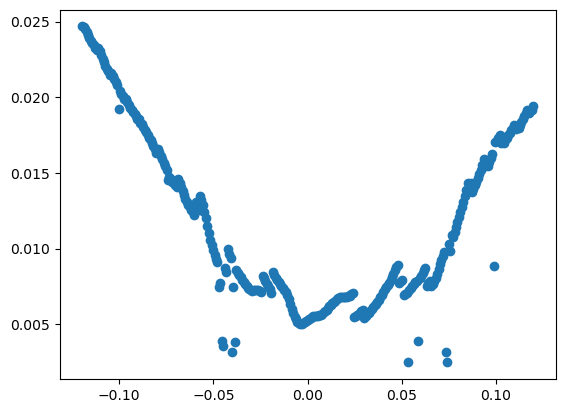

In [86]:
from arpes.fits.fit_models import GaussianModel, FermiLorentzianModel

a, b, c = np.polyfit(phis, betas, deg=2)
points = np.zeros((len(phis), 2))
for k, point in enumerate(points):
    point[0] = phis[k]
    point[1] = a*point[0]**2 + b*point[0] + c
maxes = []
for point in points:
    chunk = fermi_surface_corrected.sel(
        beta = slice(point[1]-0.005, point[1]+0.005), 
        phi = slice(point[0]-0.01, point[0]+0.01)
    ).sum('beta').sum('phi')
    
    #Fitting data to Lorentzian form
    fit = FermiLorentzianModel().guess_fit(
        chunk.sel(eV=slice(None,None)),
        params = {"fd_center": {
            "value":0,
            "vary":False
        }}
    )
    chunk_max = abs(float(fit.params['center'])) 
    maxes.append(chunk_max)
plt.scatter(phis, maxes)



In [2]:
kspace_cut = convert_to_kspace(
    cut_full_spectrum,
    ky = np.linspace(0.4,0.51,100),
    kx = np.linspace(-0.3,.3,100), 

).T

kspace_cut.S.fermi_surface.plot(cmap='inferno')

NameError: name 'convert_to_kspace' is not defined

In [1]:
cut_kspace_ = kspace_cut.sel(kx=0.3,method='nearest').sum("ky")
cut_kspace_.S.plot()
cut_max_kspace_= cut_kspace_.eV[cut_kspace_.argmax()] 
cut_max_kspace_

#Fitting data to Lorentzian form
fit = FermiLorentzianModel().guess_fit(
    cut_kspace_.sel(eV=slice(None,None)),
    params = {"fd_center": {
        "value":0,
        "vary":False
    }}
)
fit.plot()
fit.params

NameError: name 'kspace_cut' is not defined

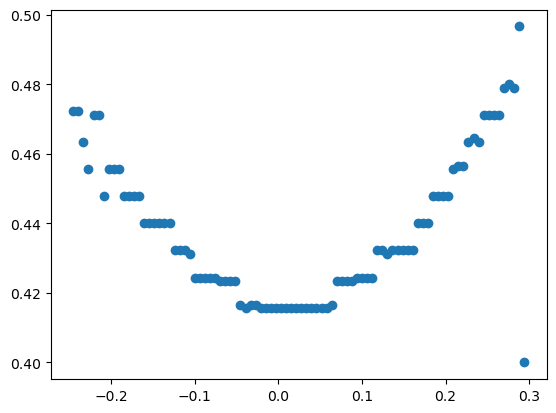

In [90]:
from arpes.fits.fit_models import GaussianModel, FermiLorentzianModel, TwoBandEdgeBModel

xs = kspace_cut['kx']
xs = xs[(xs>-0.25) & (xs<0.3)]

ys = np.zeros(len(xs))
for i, kx in enumerate(xs):
    try:
        ys[i] = kspace_cut['ky'][kspace_cut.S.fermi_surface.sel(kx=kx).argmax()]
    except ValueError:
        continue
a, b, c = np.polyfit(xs, ys, deg=2)
plt.scatter(xs, ys)

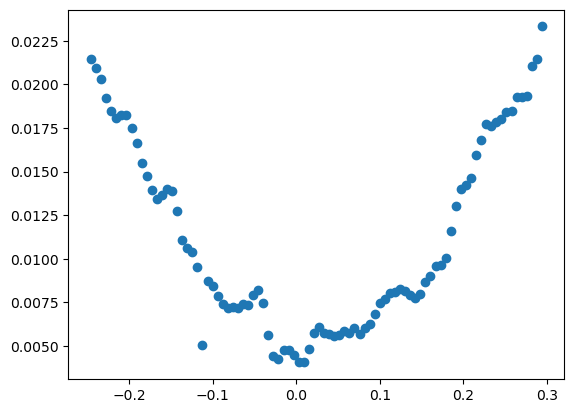

In [91]:
points = np.zeros((len(xs), 2))
xs = kspace_cut['kx']
xs = xs[(xs>-0.25) & (xs<0.3)]
for k, point in enumerate(points):
    point[0] = xs[k]
    
    point[1] = a*point[0]**2 + b*point[0] + c
    
gaps = []
for point in points:
    chunk = kspace_cut.sel(
        ky = slice(point[1]-0.01, point[1]+0.01), 
        kx = slice(point[0]-0.01, point[0]+0.01)
    ).sum('kx').sum('ky')
    #Fitting data to Lorentzian form
    fit = FermiLorentzianModel().guess_fit(
        chunk,
        params = {"fd_center": {
            "value":0,
            "vary":False
        }}
    )
    chunk_max = float(fit.params['center'])
    gaps.append(abs(chunk_max))

temp = points
plt.scatter(xs, gaps)

Text(0, 0.5, 'ky')

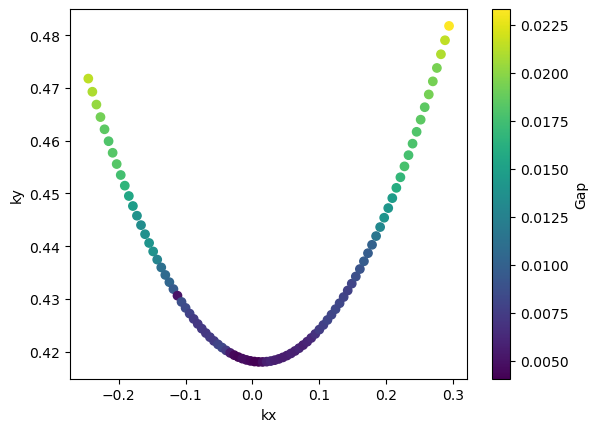

In [92]:
plt.scatter(points[:, 0], points[:, 1], c=gaps)
plt.colorbar(label='Gap')
plt.xlabel('kx')
plt.ylabel("ky")

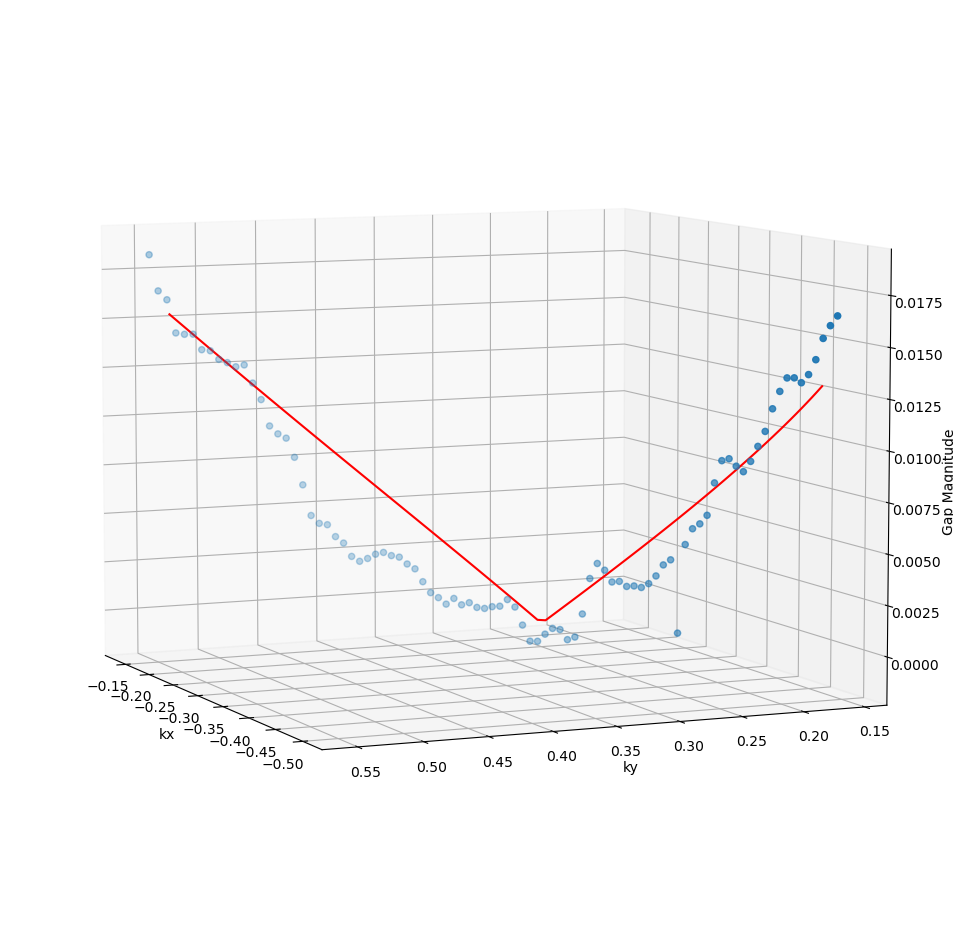

In [105]:
points = np.zeros((len(xs), 2))
for k, point in enumerate(points):
    point[0] = xs[k]
    
    point[1] = a*point[0]**2 + b*point[0] + c

from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

def quadratic_equation(x, a, b, c):
    return a * x**2 + b * x + c
p0 = (1, 1, 1)  

theta = 45 #degrees
angle = theta*np.pi/180
rotation_matrix = np.array([
    [np.cos(angle), -np.sin(angle)],
    [np.sin(angle), np.cos(angle)],
])

for i in range(len(points)):
    points[i] = np.matmul(rotation_matrix, points[i])

a_fit, b_fit, c_fit = np.polyfit(points[:, 0], points[:, 1], deg=2)

fit_y = quadratic_equation(points[:, 0], a_fit, b_fit, c_fit)

a_lattice = 3.85
# Labeling axes
ax.set_xlabel('kx')
ax.set_ylabel('ky')
ax.set_zlabel('Gap Magnitude')
ax.view_init(elev=7, azim=156)

check_fit = np.zeros(len(points[:,0]))
for i, point in enumerate(points):
    check_fit[i] = 0.011*abs(np.cos(a_lattice*point[0])-np.cos(a_lattice*point[1]))

ax.scatter(points[:, 0], points[:, 1], gaps-.005*np.ones(len(points)))
ax.plot(points[:,0], fit_y, check_fit, color='red')




In [97]:
import lmfit
fit_params = lmfit.Parameters()
fit_params['delta'] = lmfit.Parameter('delta', value=0.011)

def d_orbital_fit(params, x, data, someflag=True):
    delta = params['delta'].value
    return residual_array

d_orbital_fit(fit_params, 

$$\textbf{Dynes Formula Fitting}$$
$$N(\omega) = N_0\text{Re}\left[\frac{\omega+i\Gamma}{\sqrt{(\omega+i\Gamma)^2-\bar{\Delta}^2}}\right]$$
$\Gamma\text{: Effect of Pair Breaking Processs, } N_0\text{: Normal Density of States at Fermi Level}$